## The third In-class-exercise (9/29/2021, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:

1. tf-idf features: Using "Term Frequency" is easily to understanad and apply.
2. POS-tag features: I can predict which tag is the most possible for the context.
3. Morphological Analysis: It is an integral part of the larger natural language processing projects such as text to speech synthesis, information extraction and machine translation.
4. Entity feature: With named entity recognition, I can extract key information to understand what a text is about, or merely use it to collect important information to store in a database.
5. Word2vec features: It is a statistical method and can learn a standalone word embedding from a text corpus efficiently.

'''

Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [8]:
##tf-idf features##
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
documentA = 'the man went out for a walk'
documentB = 'the children sat around the fire'
bagOfWordsA = documentA.split(' ')
bagOfWordsB = documentB.split(' ')
uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))
print(uniqueWords)
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1
print(numOfWordsA)
print(numOfWordsB)

from nltk.corpus import stopwords
stopwords.words('english')

#Term Frequency (TF)
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict
tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)

#Inverse Data Frequency (IDF)
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict
idfs = computeIDF([numOfWordsA, numOfWordsB])
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf
tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
df = pd.DataFrame([tfidfA, tfidfB])

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform([documentA, documentB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)
df

{'out', 'a', 'fire', 'man', 'children', 'walk', 'the', 'around', 'for', 'went', 'sat'}
{'out': 1, 'a': 1, 'fire': 0, 'man': 1, 'children': 0, 'walk': 1, 'the': 1, 'around': 0, 'for': 1, 'went': 1, 'sat': 0}
{'out': 0, 'a': 0, 'fire': 1, 'man': 0, 'children': 1, 'walk': 0, 'the': 2, 'around': 1, 'for': 0, 'went': 0, 'sat': 1}


,around,children,fire,for,man,out,sat,the,walk,went
0,0.000000,0.000000,0.000000,0.42616,0.42616,0.42616,0.000000,0.303216,0.42616,0.42616
1,0.407401,0.407401,0.407401,0.00000,0.00000,0.00000,0.407401,0.579739,0.00000,0.00000


In [4]:
##POS-tag features##
import nltk
nltk.download('universal_tagset')
example = ['The', 'little', 'yellow', 'dog', 'barked', 'loudly', 'at', 'the', 'cat', '.']
# with default tagset (Penn Treebank)
# nltk.pos_tag(example)
# with universal tagset
nltk.pos_tag(example, tagset='universal')

[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/chunghsinhsuan/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


[('The', 'DET'),
 ('little', 'ADJ'),
 ('yellow', 'ADJ'),
 ('dog', 'NOUN'),
 ('barked', 'VERB'),
 ('loudly', 'ADV'),
 ('at', 'ADP'),
 ('the', 'DET'),
 ('cat', 'NOUN'),
 ('.', '.')]

In [58]:
##Morphological Analysis##
# Import the spaCy library
import spacy
# Load the small language model for English and assign it to the variable 'nlp'
nlp = spacy.load('en_core_web_sm')

# Assign an example sentence to the variable 'text'
text = "The Federal Bureau of Investigation has been ordered to track down as many as 3,000 Iraqis in this country whose visas have expired, the Justice Department said yesterday."

# Feed the string object under 'text' to the Language object under 'nlp'
# Store the result under the variable 'doc'
doc = nlp(text)
    
# Loop over items in the Doc object, using the variable 'token' to refer to items in the list
for token in doc:
    # Print the token and the results of morphological analysis
    print(token, token.morph)

doc[21].morph.to_dict()

The Definite=Def|PronType=Art
Federal NounType=Prop|Number=Sing
Bureau NounType=Prop|Number=Sing
of 
Investigation NounType=Prop|Number=Sing
has Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
been Tense=Past|VerbForm=Part
ordered Aspect=Perf|Tense=Past|VerbForm=Part
to 
track VerbForm=Inf
down 
as 
many Degree=Pos
as 
3,000 NumType=Card
Iraqis NounType=Prop|Number=Plur
in 
this Number=Sing|PronType=Dem
country Number=Sing
whose Poss=Yes
visas Number=Plur
have Mood=Ind|Tense=Pres|VerbForm=Fin
expired Aspect=Perf|Tense=Past|VerbForm=Part
, PunctType=Comm
the Definite=Def|PronType=Art
Justice NounType=Prop|Number=Sing
Department NounType=Prop|Number=Sing
said Tense=Past|VerbForm=Fin
yesterday Number=Sing
. PunctType=Peri


{'Mood': 'Ind', 'Tense': 'Pres', 'VerbForm': 'Fin'}

In [60]:
##Entity feature##
import spacy
# nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()

entity_types = ['PERSON','NORP','FAC','ORG','GPE','LOC','PRODUCT','EVENT','WORK_OF_ART','LAW',
                'LANGUAGE','DATE','TIME','PERCENT','MONEY','QUANTITY','ORDINAL','CARDINAL']

entity_name = ['person','Nationality','Building','Institution','country','location','PRODUCT','EVENT','Title','LAW',
                'LANGUAGE','DATE','TIME','PERCENT','MONEY','QUANTITY','ORDINAL','CARDINAL']

def entity_extraction(sentence):
    entity_list = []
    doc = nlp(sentence)
    for ent in doc.ents:
        entity_list.append([ent.text, ent.start_char, ent.end_char, ent.label_])
    
    return entity_list
# input a sentence
sentence = "Apple is looking at buying U.K. startup for $1 billion"
entity_list = entity_extraction(sentence)
print(entity_list)

[['Apple', 0, 5, 'ORG'], ['U.K.', 27, 31, 'GPE'], ['$1 billion', 44, 54, 'MONEY']]


In [32]:
##Word2vec features##
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
data_corpus=["guru99 is the best sitefor online tutorials. I love to visit guru99."]
vocabulary=vectorizer.fit(data_corpus)
X= vectorizer.transform(data_corpus)
print(X.toarray())
print(vocabulary.get_feature_names())

[[1 2 1 1 1 1 1 1 1 1]]
['best', 'guru99', 'is', 'love', 'online', 'sitefor', 'the', 'to', 'tutorials', 'visit']


Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [33]:
# You code here (Please add comments in the code):

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Data generation and model fitting
X, y = make_classification(
    n_samples=1000, n_features=5, n_informative=3, n_redundant=0,
    n_repeated=0, n_classes=2, random_state=0, shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)
from sklearn.ensemble import RandomForestClassifier

feature_names = [
"tf-idf features", 
"POS-tag features",
"Morphological Analysis",
"Entity feature",
"Word2vec features"]

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

# Feature importance based on mean decrease in impurity
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

# print(f"Elapsed time to compute the importances: "f"{elapsed_time:.3f} seconds")
# plot the impurity-based importance
import pandas as pd
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Feature: 0, Score: 31.39469
Feature: 1, Score: 7.06075
Feature: 2, Score: 32.77274
Feature: 3, Score: 8.82140
Feature: 4, Score: 72.71233


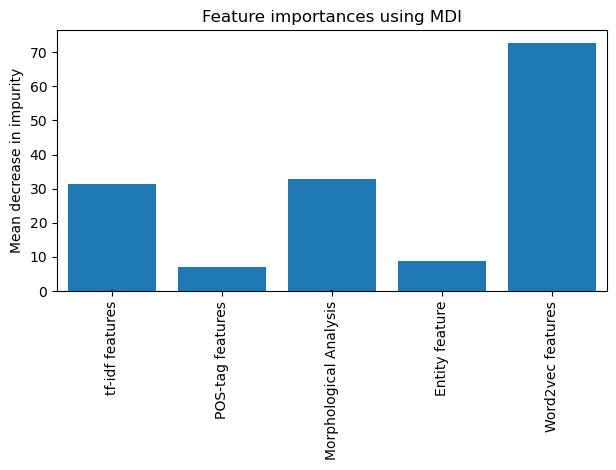

In [34]:
# Filter model
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=5, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

The most important feature is Word2vec features.
The importance in descending order: 72.71233, 32.77274, 31.39469, 8.82140, 7.06075.